<h1><center>Actividad 2</center></h1>
<h2><center>Data Imputation & Normalization</center></h2>
<h3><center>Juan Manuel Aviña Muñoz</center></h3>

# Import libraries

In [40]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load DataSet

In [41]:
# Load data from a CSV file into a Pandas DataFrame
data = pd.read_csv("/home/jxn/Documents/UAQ/3er_semestre/Machine_Learning/DB/Stars_mod.csv")

print(data)

     Temperature              L          R    A_M  Color Spectral_Class  Type
0            NaN       0.002400     0.1700  16.12    NaN              M     0
1            NaN       0.000500     0.1542  16.60    NaN              M     0
2         2600.0       0.000300     0.1020  18.70    Red              M     0
3         2800.0       0.000200     0.1600  16.65    Red              M     0
4         1939.0       0.000138     0.1030  20.06    Red              M     0
..           ...            ...        ...    ...    ...            ...   ...
235      38940.0  374830.000000  1356.0000  -9.93   Blue              O     5
236      30839.0  834042.000000  1194.0000 -10.63   Blue              O     5
237       8829.0  537493.000000  1423.0000 -10.73  white              A     5
238       9235.0  404940.000000  1112.0000 -11.23  white              A     5
239      37882.0  294903.000000  1783.0000  -7.80   Blue              O     5

[240 rows x 7 columns]


# Check for any missing values

In [42]:
data.isnull().sum()

Temperature       48
L                  0
R                  0
A_M                0
Color             48
Spectral_Class     0
Type               0
dtype: int64

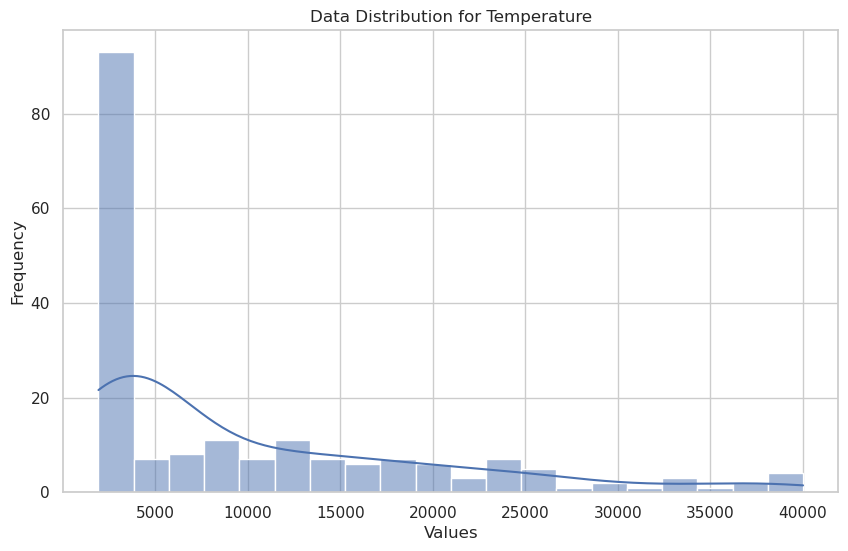

Summary Statistics:
         Temperature              L            R         A_M        Type
count    192.000000     240.000000   240.000000  240.000000  240.000000
mean   10342.380208  107188.361635   237.157781    4.382396    2.500000
std     9639.464091  179432.244940   517.155763   10.532512    1.711394
min     1939.000000       0.000080     0.008400  -11.920000    0.000000
25%     3341.750000       0.000865     0.102750   -6.232500    1.000000
50%     4406.500000       0.070500     0.762500    8.313000    2.500000
75%    15055.500000  198050.000000    42.750000   13.697500    4.000000
max    40000.000000  849420.000000  1948.500000   20.060000    5.000000

Frequency Distribution:
 2600.0     2
3625.0     2
3523.0     2
3324.0     2
3598.0     2
          ..
10980.0    1
13720.0    1
19860.0    1
4526.0     1
37882.0    1
Name: Temperature, Length: 184, dtype: int64


In [43]:
# Get summary statistics of numerical columns
numerical_summary = data.describe()

# Get the frequency distribution
categorical_distribution = data['Temperature'].value_counts()

# Visualize the data distribution
sns.set(style="whitegrid")  # Setting the style for seaborn plots
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.histplot(data['Temperature'], bins=20, kde=True)  # Histogram with KDE (Kernel Density Estimate)
plt.title('Data Distribution for Temperature')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# Display summary statistics and frequency distribution
print("Summary Statistics:\n", numerical_summary)
print("\nFrequency Distribution:\n", categorical_distribution)

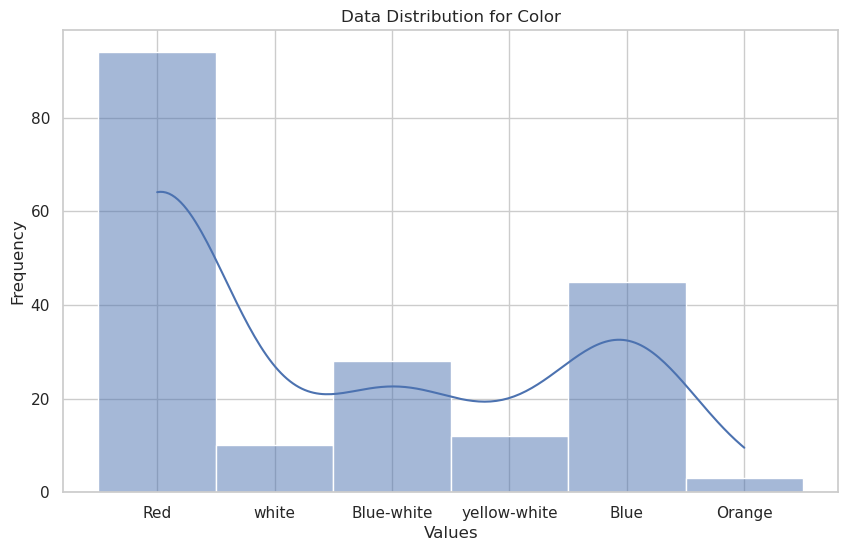

Summary Statistics:
         Temperature              L            R         A_M        Type
count    192.000000     240.000000   240.000000  240.000000  240.000000
mean   10342.380208  107188.361635   237.157781    4.382396    2.500000
std     9639.464091  179432.244940   517.155763   10.532512    1.711394
min     1939.000000       0.000080     0.008400  -11.920000    0.000000
25%     3341.750000       0.000865     0.102750   -6.232500    1.000000
50%     4406.500000       0.070500     0.762500    8.313000    2.500000
75%    15055.500000  198050.000000    42.750000   13.697500    4.000000
max    40000.000000  849420.000000  1948.500000   20.060000    5.000000

Frequency Distribution:
 Red             94
Blue            45
Blue-white      28
yellow-white    12
white           10
Orange           3
Name: Color, dtype: int64


In [44]:
# Get summary statistics of numerical columns
numerical_summary = data.describe()

# Get the frequency distribution of a categorical column
categorical_distribution = data['Color'].value_counts()

# Visualize the data distribution
sns.set(style="whitegrid")  # Setting the style for seaborn plots
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.histplot(data['Color'], bins=20, kde=True)  # Histogram with KDE (Kernel Density Estimate)
plt.title('Data Distribution for Color')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# Display summary statistics and frequency distribution
print("Summary Statistics:\n", numerical_summary)
print("\nFrequency Distribution:\n", categorical_distribution)

In [45]:
# Save our dataset to a csv for further use
data.to_csv("/home/jxn/Documents/UAQ/3er_semestre/Machine_Learning/DB/Stars_mod2.csv", index=False)

<h1><center>Data Imputation</center></h1>
<h2>For numerical data</h2>

# Using mean

In [46]:
# Load data from a CSV file into a Pandas DataFrame
data = pd.read_csv("/home/jxn/Documents/UAQ/3er_semestre/Machine_Learning/DB/Stars_mod2.csv")


# Calculate de mean value of non-missing values in the column
mean_value = data['Temperature'].mean()

# Impute the missing values with mean
data['Temperature'].fillna(mean_value, inplace=True)

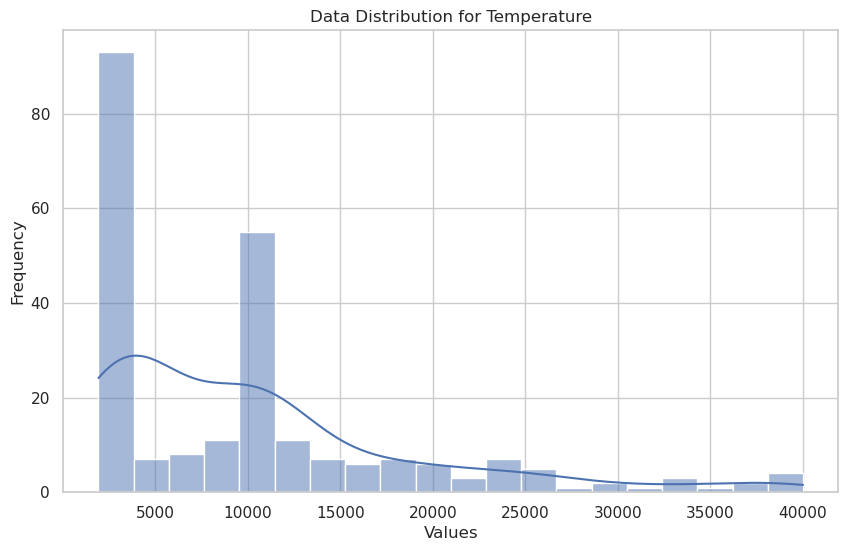

Summary Statistics:
         Temperature              L            R         A_M        Type
count    240.000000     240.000000   240.000000  240.000000  240.000000
mean   10342.380208  107188.361635   237.157781    4.382396    2.500000
std     8617.288301  179432.244940   517.155763   10.532512    1.711394
min     1939.000000       0.000080     0.008400  -11.920000    0.000000
25%     3488.500000       0.000865     0.102750   -6.232500    1.000000
50%     9796.000000       0.070500     0.762500    8.313000    2.500000
75%    12930.000000  198050.000000    42.750000   13.697500    4.000000
max    40000.000000  849420.000000  1948.500000   20.060000    5.000000

Frequency Distribution:
 10342.380208    48
3607.000000      2
3625.000000      2
3324.000000      2
3523.000000      2
                ..
7100.000000      1
10574.000000     1
8930.000000      1
17200.000000     1
37882.000000     1
Name: Temperature, Length: 185, dtype: int64


In [47]:
# Get summary statistics of numerical columns
numerical_summary = data.describe()

# Get the frequency distribution of a categorical column
categorical_distribution = data['Temperature'].value_counts()

# Visualize the data distribution
sns.set(style="whitegrid")  # Setting the style for seaborn plots
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.histplot(data['Temperature'], bins=20, kde=True)  # Histogram with KDE (Kernel Density Estimate)
plt.title('Data Distribution for Temperature')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# Display summary statistics and frequency distribution
print("Summary Statistics:\n", numerical_summary)
print("\nFrequency Distribution:\n", categorical_distribution)

# Using roulette

In [48]:
# Load data from a CSV file into a Pandas DataFrame
data = pd.read_csv("/home/jxn/Documents/UAQ/3er_semestre/Machine_Learning/DB/Stars_mod2.csv")


# Calculate the probability distribution of non-missing values in the column
non_missing_values = data['Temperature'].dropna()
value_counts = non_missing_values.value_counts()
probabilities = value_counts / len(non_missing_values)

# Impute missing values based on the distribution of non-missing values
missing_indices = data[data['Temperature'].isnull()].index
imputed_values = np.random.choice(probabilities.index, size=len(missing_indices), p=probabilities.values)

# Assign the imputed values to the missing entries in the DataFrame
data.loc[missing_indices, 'Temperature'] = imputed_values

print(data)

     Temperature              L          R    A_M  Color Spectral_Class  Type
0         8927.0       0.002400     0.1700  16.12    NaN              M     0
1         3295.0       0.000500     0.1542  16.60    NaN              M     0
2         2600.0       0.000300     0.1020  18.70    Red              M     0
3         2800.0       0.000200     0.1600  16.65    Red              M     0
4         1939.0       0.000138     0.1030  20.06    Red              M     0
..           ...            ...        ...    ...    ...            ...   ...
235      38940.0  374830.000000  1356.0000  -9.93   Blue              O     5
236      30839.0  834042.000000  1194.0000 -10.63   Blue              O     5
237       8829.0  537493.000000  1423.0000 -10.73  white              A     5
238       9235.0  404940.000000  1112.0000 -11.23  white              A     5
239      37882.0  294903.000000  1783.0000  -7.80   Blue              O     5

[240 rows x 7 columns]


In [49]:
# Check for any missing values
data.isnull().sum()

Temperature        0
L                  0
R                  0
A_M                0
Color             48
Spectral_Class     0
Type               0
dtype: int64

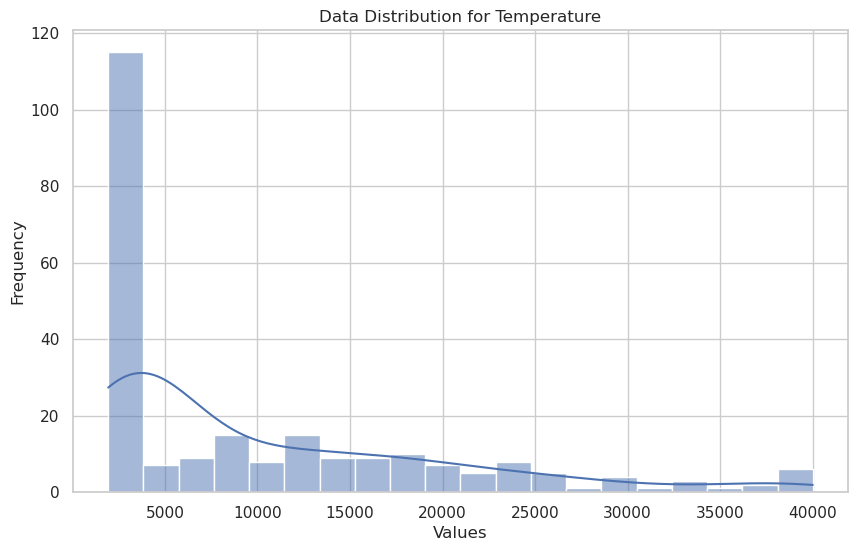

Summary Statistics:
         Temperature              L            R         A_M        Type
count    240.000000     240.000000   240.000000  240.000000  240.000000
mean   10460.008333  107188.361635   237.157781    4.382396    2.500000
std     9603.523869  179432.244940   517.155763   10.532512    1.711394
min     1939.000000       0.000080     0.008400  -11.920000    0.000000
25%     3319.000000       0.000865     0.102750   -6.232500    1.000000
50%     5046.000000       0.070500     0.762500    8.313000    2.500000
75%    16417.500000  198050.000000    42.750000   13.697500    4.000000
max    40000.000000  849420.000000  1948.500000   20.060000    5.000000

Frequency Distribution:
 3598.0     3
3625.0     3
17140.0    3
18000.0    3
2650.0     3
          ..
4077.0     1
4526.0     1
19860.0    1
7220.0     1
37882.0    1
Name: Temperature, Length: 184, dtype: int64


In [50]:
# Get summary statistics of numerical columns
numerical_summary = data.describe()

# Get the frequency distribution of a categorical column
categorical_distribution = data['Temperature'].value_counts()

# Visualize the data distribution
sns.set(style="whitegrid")  # Setting the style for seaborn plots
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.histplot(data['Temperature'], bins=20, kde=True)  # Histogram with KDE (Kernel Density Estimate)
plt.title('Data Distribution for Temperature')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# Display summary statistics and frequency distribution
print("Summary Statistics:\n", numerical_summary)
print("\nFrequency Distribution:\n", categorical_distribution)

In [51]:
# Save our dataset to a csv for further use
data.to_csv("/home/jxn/Documents/UAQ/3er_semestre/Machine_Learning/DB/Stars_mod3.csv", index=False)

<h1><center>Data Imputation</center></h1>
<h2>For categorical data</h2>

# Using mode

In [52]:
# Load data from a CSV file into a Pandas DataFrame
data = pd.read_csv("/home/jxn/Documents/UAQ/3er_semestre/Machine_Learning/DB/Stars_mod3.csv")


# Replace missing values in the "Color" column with the mode
data['Color'].fillna(data['Color'].mode()[0], inplace=True)

print(data)

     Temperature              L          R    A_M  Color Spectral_Class  Type
0         8927.0       0.002400     0.1700  16.12    Red              M     0
1         3295.0       0.000500     0.1542  16.60    Red              M     0
2         2600.0       0.000300     0.1020  18.70    Red              M     0
3         2800.0       0.000200     0.1600  16.65    Red              M     0
4         1939.0       0.000138     0.1030  20.06    Red              M     0
..           ...            ...        ...    ...    ...            ...   ...
235      38940.0  374830.000000  1356.0000  -9.93   Blue              O     5
236      30839.0  834042.000000  1194.0000 -10.63   Blue              O     5
237       8829.0  537493.000000  1423.0000 -10.73  white              A     5
238       9235.0  404940.000000  1112.0000 -11.23  white              A     5
239      37882.0  294903.000000  1783.0000  -7.80   Blue              O     5

[240 rows x 7 columns]


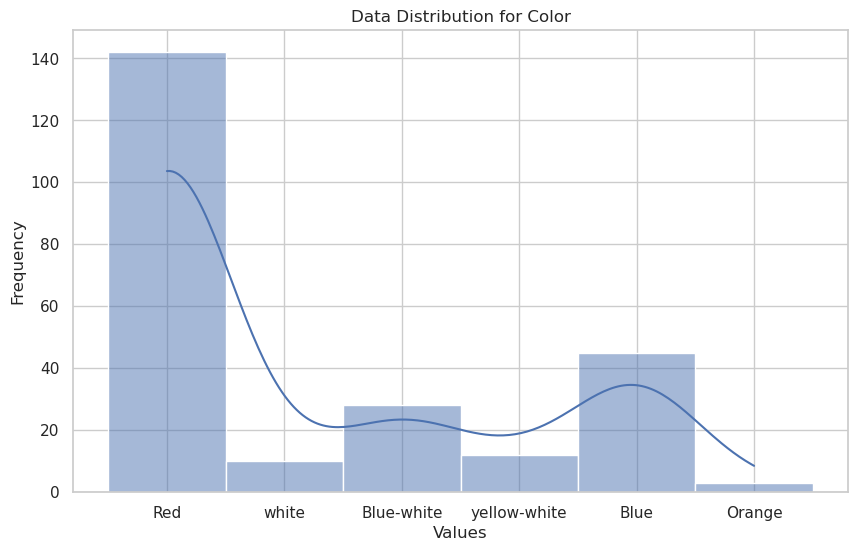

Summary Statistics:
         Temperature              L            R         A_M        Type
count    240.000000     240.000000   240.000000  240.000000  240.000000
mean   10460.008333  107188.361635   237.157781    4.382396    2.500000
std     9603.523869  179432.244940   517.155763   10.532512    1.711394
min     1939.000000       0.000080     0.008400  -11.920000    0.000000
25%     3319.000000       0.000865     0.102750   -6.232500    1.000000
50%     5046.000000       0.070500     0.762500    8.313000    2.500000
75%    16417.500000  198050.000000    42.750000   13.697500    4.000000
max    40000.000000  849420.000000  1948.500000   20.060000    5.000000

Frequency Distribution:
 Red             142
Blue             45
Blue-white       28
yellow-white     12
white            10
Orange            3
Name: Color, dtype: int64


In [53]:
# Get summary statistics of numerical columns
numerical_summary = data.describe()

# Get the frequency distribution of a categorical column
categorical_distribution = data['Color'].value_counts()

# Visualize the data distribution
sns.set(style="whitegrid")  # Setting the style for seaborn plots
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.histplot(data['Color'], bins=20, kde=True)  # Histogram with KDE (Kernel Density Estimate)
plt.title('Data Distribution for Color')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# Display summary statistics and frequency distribution
print("Summary Statistics:\n", numerical_summary)
print("\nFrequency Distribution:\n", categorical_distribution)

# Using random impute

In [54]:
# Load data from a CSV file into a Pandas DataFrame
data = pd.read_csv("/home/jxn/Documents/UAQ/3er_semestre/Machine_Learning/DB/Stars_mod3.csv")


# Calculate the distribution of categories in the column
category_distribution = data['Color'].value_counts(normalize=True)

# Replace missing values with random choices based on the distribution
missing_indices = data[data['Color'].isnull()].index
data.loc[missing_indices, 'Color'] = random.choices(
    category_distribution.index,
    weights=category_distribution.values,
    k=len(missing_indices)
)

In [55]:
# Check for missing data
data.isnull().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

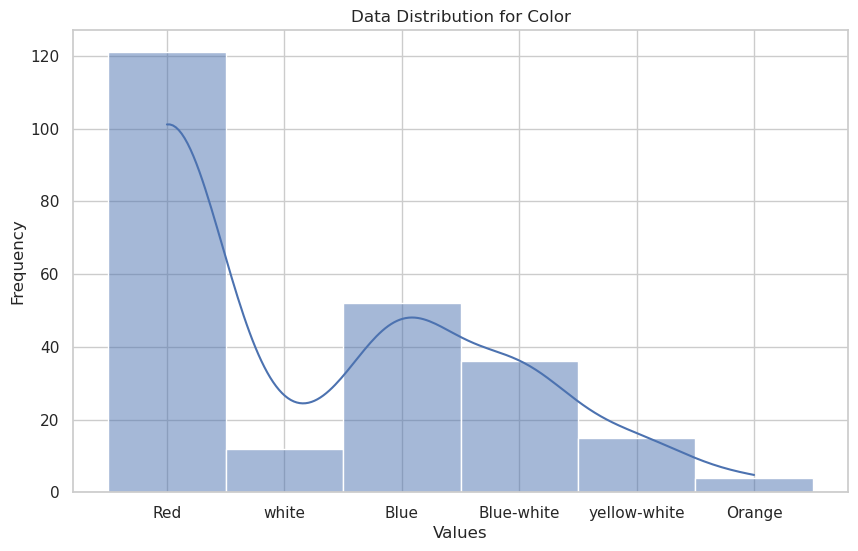

Summary Statistics:
         Temperature              L            R         A_M        Type
count    240.000000     240.000000   240.000000  240.000000  240.000000
mean   10460.008333  107188.361635   237.157781    4.382396    2.500000
std     9603.523869  179432.244940   517.155763   10.532512    1.711394
min     1939.000000       0.000080     0.008400  -11.920000    0.000000
25%     3319.000000       0.000865     0.102750   -6.232500    1.000000
50%     5046.000000       0.070500     0.762500    8.313000    2.500000
75%    16417.500000  198050.000000    42.750000   13.697500    4.000000
max    40000.000000  849420.000000  1948.500000   20.060000    5.000000

Frequency Distribution:
 Red             121
Blue             52
Blue-white       36
yellow-white     15
white            12
Orange            4
Name: Color, dtype: int64


In [56]:
# Get summary statistics of numerical columns
numerical_summary = data.describe()

# Get the frequency distribution of a categorical column
categorical_distribution = data['Color'].value_counts()

# Visualize the data distribution
sns.set(style="whitegrid")  # Setting the style for seaborn plots
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.histplot(data['Color'], bins=20, kde=True)  # Histogram with KDE (Kernel Density Estimate)
plt.title('Data Distribution for Color')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# Display summary statistics and frequency distribution
print("Summary Statistics:\n", numerical_summary)
print("\nFrequency Distribution:\n", categorical_distribution)

In [57]:
# Save our dataset to a csv for further use
data.to_csv("/home/jxn/Documents/UAQ/3er_semestre/Machine_Learning/DB/Stars_mod4.csv", index=False)

<h1><center>Data Normalization</center></h1>
<h2>For numerical data usin Min-Max Scaling</h2>

In [58]:
# Load data from a CSV file into a Pandas DataFrame
data = pd.read_csv("/home/jxn/Documents/UAQ/3er_semestre/Machine_Learning/DB/Stars_mod4.csv")


# Define the features to normalize
selected_columns = ['Temperature', "Type"]

In [59]:
# Create a MinMaxScaler object for feature scaling
scaler = MinMaxScaler()

# Apply Min-Max scaling to the selected columns
data[selected_columns] = scaler.fit_transform(data[selected_columns])

print(data)

     Temperature              L          R    A_M  Color Spectral_Class  Type
0       0.183600       0.002400     0.1700  16.12    Red              M   0.0
1       0.035627       0.000500     0.1542  16.60    Red              M   0.0
2       0.017367       0.000300     0.1020  18.70    Red              M   0.0
3       0.022622       0.000200     0.1600  16.65    Red              M   0.0
4       0.000000       0.000138     0.1030  20.06    Red              M   0.0
..           ...            ...        ...    ...    ...            ...   ...
235     0.972150  374830.000000  1356.0000  -9.93   Blue              O   1.0
236     0.759307  834042.000000  1194.0000 -10.63   Blue              O   1.0
237     0.181025  537493.000000  1423.0000 -10.73  white              A   1.0
238     0.191692  404940.000000  1112.0000 -11.23  white              A   1.0
239     0.944352  294903.000000  1783.0000  -7.80   Blue              O   1.0

[240 rows x 7 columns]


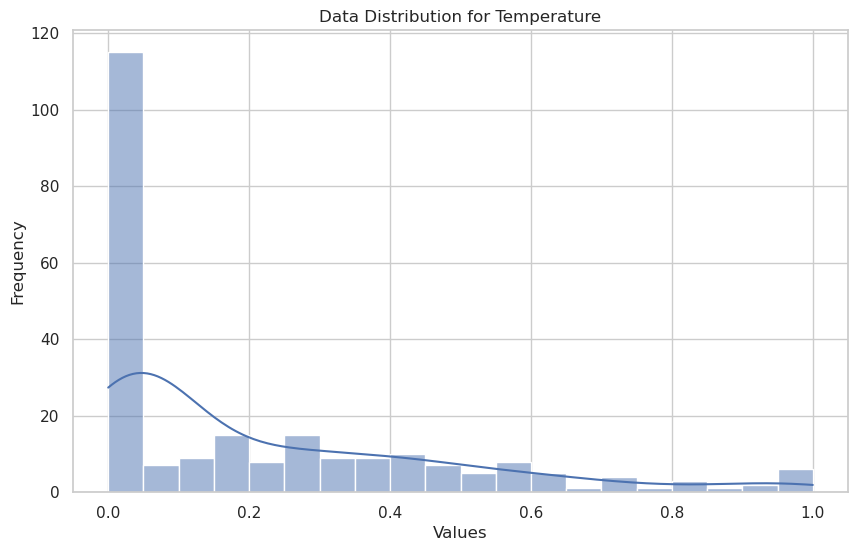

Summary Statistics:
        Temperature              L            R         A_M        Type
count   240.000000     240.000000   240.000000  240.000000  240.000000
mean      0.223878  107188.361635   237.157781    4.382396    0.500000
std       0.252319  179432.244940   517.155763   10.532512    0.342279
min       0.000000       0.000080     0.008400  -11.920000    0.000000
25%       0.036258       0.000865     0.102750   -6.232500    0.200000
50%       0.081632       0.070500     0.762500    8.313000    0.500000
75%       0.380403  198050.000000    42.750000   13.697500    0.800000
max       1.000000  849420.000000  1948.500000   20.060000    1.000000

Frequency Distribution:
 0.043588    3
0.044297    3
0.399385    3
0.421981    3
0.018681    3
           ..
0.056173    1
0.067970    1
0.470849    1
0.138751    1
0.944352    1
Name: Temperature, Length: 184, dtype: int64


In [60]:
# Get summary statistics of numerical columns
numerical_summary = data.describe()

# Get the frequency distribution of a categorical column
categorical_distribution = data['Temperature'].value_counts()

# Visualize the data distribution
sns.set(style="whitegrid")  # Setting the style for seaborn plots
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.histplot(data['Temperature'], bins=20, kde=True)  # Histogram with KDE (Kernel Density Estimate)
plt.title('Data Distribution for Temperature')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# Display summary statistics and frequency distribution
print("Summary Statistics:\n", numerical_summary)
print("\nFrequency Distribution:\n", categorical_distribution)

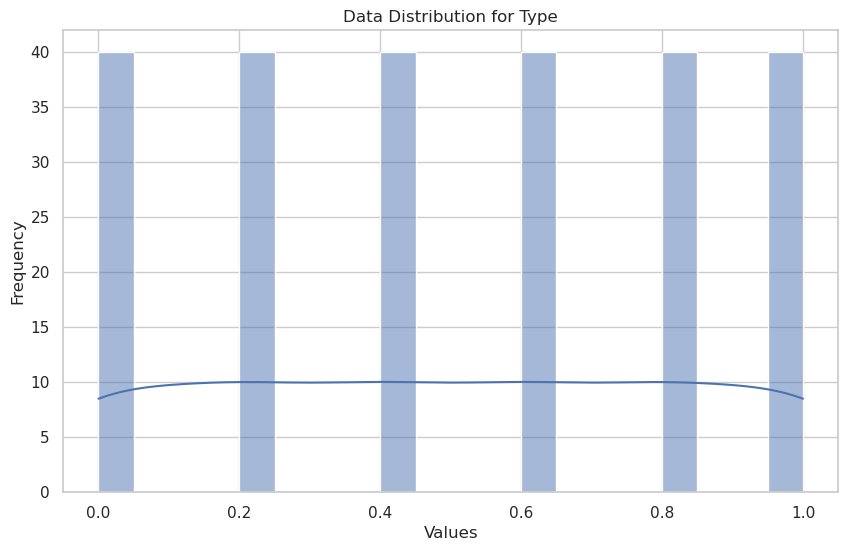

Summary Statistics:
        Temperature              L            R         A_M        Type
count   240.000000     240.000000   240.000000  240.000000  240.000000
mean      0.223878  107188.361635   237.157781    4.382396    0.500000
std       0.252319  179432.244940   517.155763   10.532512    0.342279
min       0.000000       0.000080     0.008400  -11.920000    0.000000
25%       0.036258       0.000865     0.102750   -6.232500    0.200000
50%       0.081632       0.070500     0.762500    8.313000    0.500000
75%       0.380403  198050.000000    42.750000   13.697500    0.800000
max       1.000000  849420.000000  1948.500000   20.060000    1.000000

Frequency Distribution:
 0.0    40
0.2    40
0.4    40
0.6    40
0.8    40
1.0    40
Name: Type, dtype: int64


In [61]:
# Get summary statistics of numerical columns
numerical_summary = data.describe()

# Get the frequency distribution of a categorical column
categorical_distribution = data['Type'].value_counts()

# Visualize the data distribution
sns.set(style="whitegrid")  # Setting the style for seaborn plots
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.histplot(data['Type'], bins=20, kde=True)  # Histogram with KDE (Kernel Density Estimate)
plt.title('Data Distribution for Type')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# Display summary statistics and frequency distribution
print("Summary Statistics:\n", numerical_summary)
print("\nFrequency Distribution:\n", categorical_distribution)

In [62]:
# Save our dataset to a csv for further use
data.to_csv("/home/jxn/Documents/UAQ/3er_semestre/Machine_Learning/DB/Stars_2.csv", index=False)
print(data)

     Temperature              L          R    A_M  Color Spectral_Class  Type
0       0.183600       0.002400     0.1700  16.12    Red              M   0.0
1       0.035627       0.000500     0.1542  16.60    Red              M   0.0
2       0.017367       0.000300     0.1020  18.70    Red              M   0.0
3       0.022622       0.000200     0.1600  16.65    Red              M   0.0
4       0.000000       0.000138     0.1030  20.06    Red              M   0.0
..           ...            ...        ...    ...    ...            ...   ...
235     0.972150  374830.000000  1356.0000  -9.93   Blue              O   1.0
236     0.759307  834042.000000  1194.0000 -10.63   Blue              O   1.0
237     0.181025  537493.000000  1423.0000 -10.73  white              A   1.0
238     0.191692  404940.000000  1112.0000 -11.23  white              A   1.0
239     0.944352  294903.000000  1783.0000  -7.80   Blue              O   1.0

[240 rows x 7 columns]
